## Using MECSim
To be finished soon

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
if '../' not in sys.path:
    sys.path.insert(0,'../')
    
from pymecsim import pysed
from pymecsim.core import MECSIM

In [3]:
import subprocess, shlex
from pymecsim.utils import ReadMECSimOut, plotcv

def MECSIM():
    args = shlex.split('chmod u+x ../src/MECSim')
    process = subprocess.Popen(args,stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    args = shlex.split('../src/MECSim')
    process = subprocess.Popen(args,stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    
    T,V,I = ReadMECSimOut('./MECSimOutput_Pot.txt')
    
    output = {'current':I,'voltage':V,'time':T,'info':[stdout,stderr]}
    
    return output

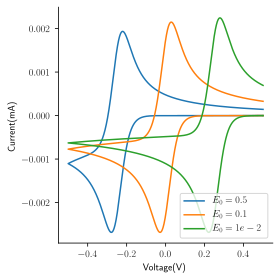

In [3]:
import pdb
from pymecsim.utils import plotcv
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_formats = ['svg']

mechanism  = '../mechanisms/cvexamples.sk'
E0 = [-0.25,0.0,0.25]
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)
for i,e0 in enumerate(E0):
    pysed.replace('$E0', str(e0), mechanism)
    out = MECSIM()
    T = out['time']
    forward_sweep = np.arange(len(T)/2,len(T)).astype(int)
    ax = plotcv(out['current'],out['voltage'], ax = ax)
    ax.set_label("E0 = "+str(e0))
plt.legend([r'$E_0=0.5$',r'$E_0=0.1$',r'$E_0=1e-2$'],loc='lower right')
plt.savefig('cvexample.png',dpi=500,bbox_inches='tight')
plt.show()